In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold

In [5]:
from sklearn.datasets import load_boston

In [11]:
boston = load_boston()
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df.head()

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


<AxesSubplot: >

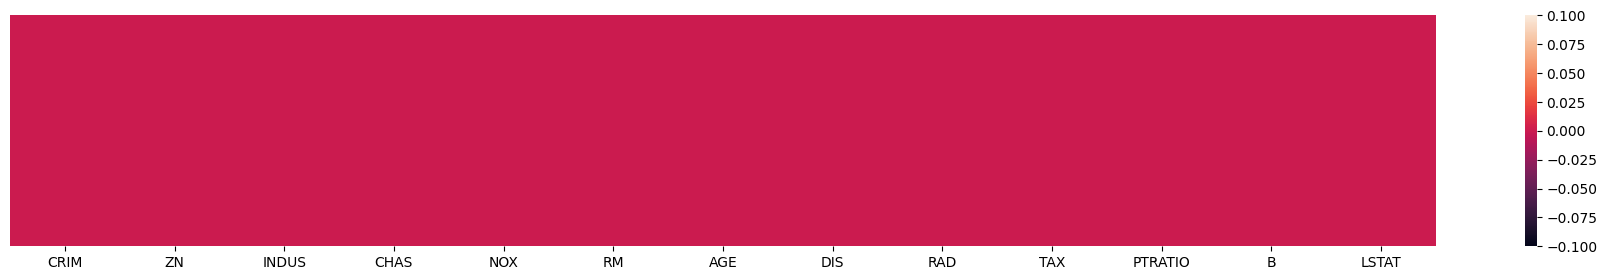

In [12]:
missing_values = df.isnull().sum()
print(missing_values)
plt.figure(figsize=(23, 3))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [14]:
def find_constant_columns(df):
    """
    Returns a list of column names with only one constant value in the input Pandas DataFrame.
    """
    constant_cols = []
    for col in df.columns:
        if len(df[col].unique()) == 1:
            constant_cols.append(col)
    return constant_cols

In [15]:
constant_cols = find_constant_columns(df)
print(constant_cols)

[]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3720\1934815532.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3720\1934815532.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_matrix_lower = corr_mat

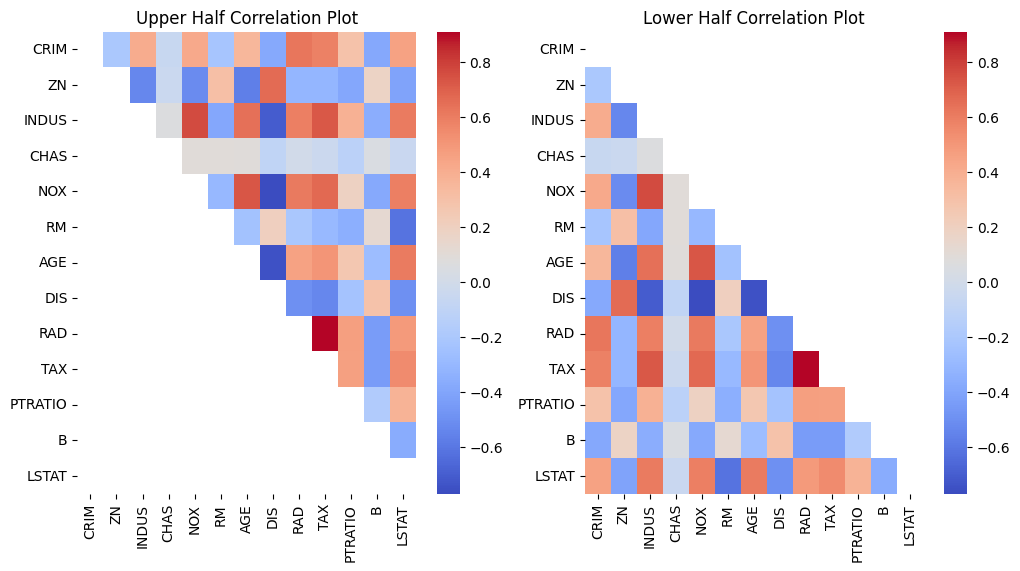

In [16]:
corr_matrix = df.corr()

# Split the correlation matrix into two 
corr_matrix_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
corr_matrix_lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(np.bool))

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(12, 6))

# Plot the upper half of the correlation matrix on the left subplot
sns.heatmap(corr_matrix_upper, cmap='coolwarm', annot=False, ax=axes[0])
axes[0].set_title('Upper Half Correlation Plot')
# Plot the lower half of the correlation matrix on the right subplot
sns.heatmap(corr_matrix_lower, cmap='coolwarm', annot=False, ax=axes[1])
axes[1].set_title('Lower Half Correlation Plot')

# Display the plot
plt.show()

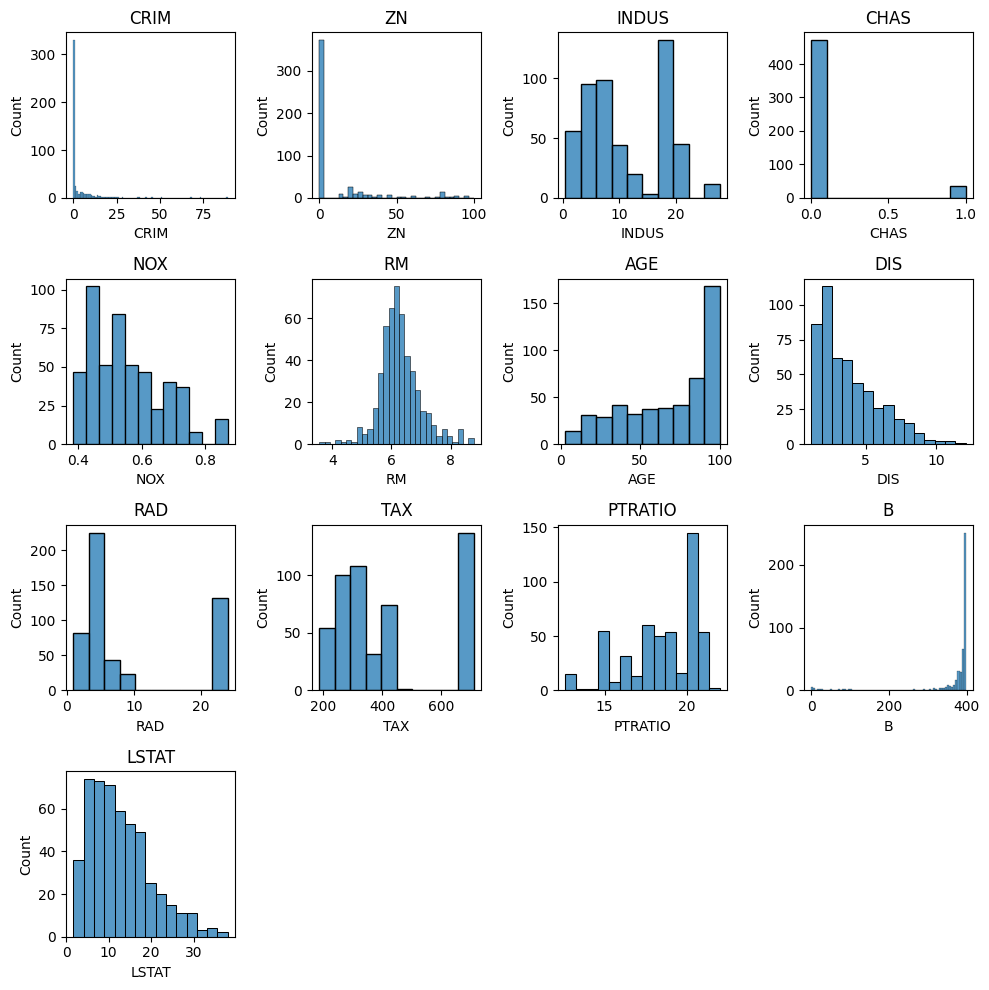

In [17]:
num_cols = df.select_dtypes(include='number').columns
num_cols_count = len(num_cols)
num_cols_sqrt = int(num_cols_count**0.5) + 1

fig, axs = plt.subplots(nrows=num_cols_sqrt, ncols=num_cols_sqrt, figsize=(10,10))

for i, column in enumerate(num_cols):
    row = i // num_cols_sqrt
    col = i % num_cols_sqrt
    sns.histplot(df[column], ax=axs[row][col], kde=False)
    axs[row][col].set_title(column)

# Remove empty subplots
for i in range(num_cols_count, num_cols_sqrt*num_cols_sqrt):
    row = i // num_cols_sqrt
    col = i % num_cols_sqrt
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.show()

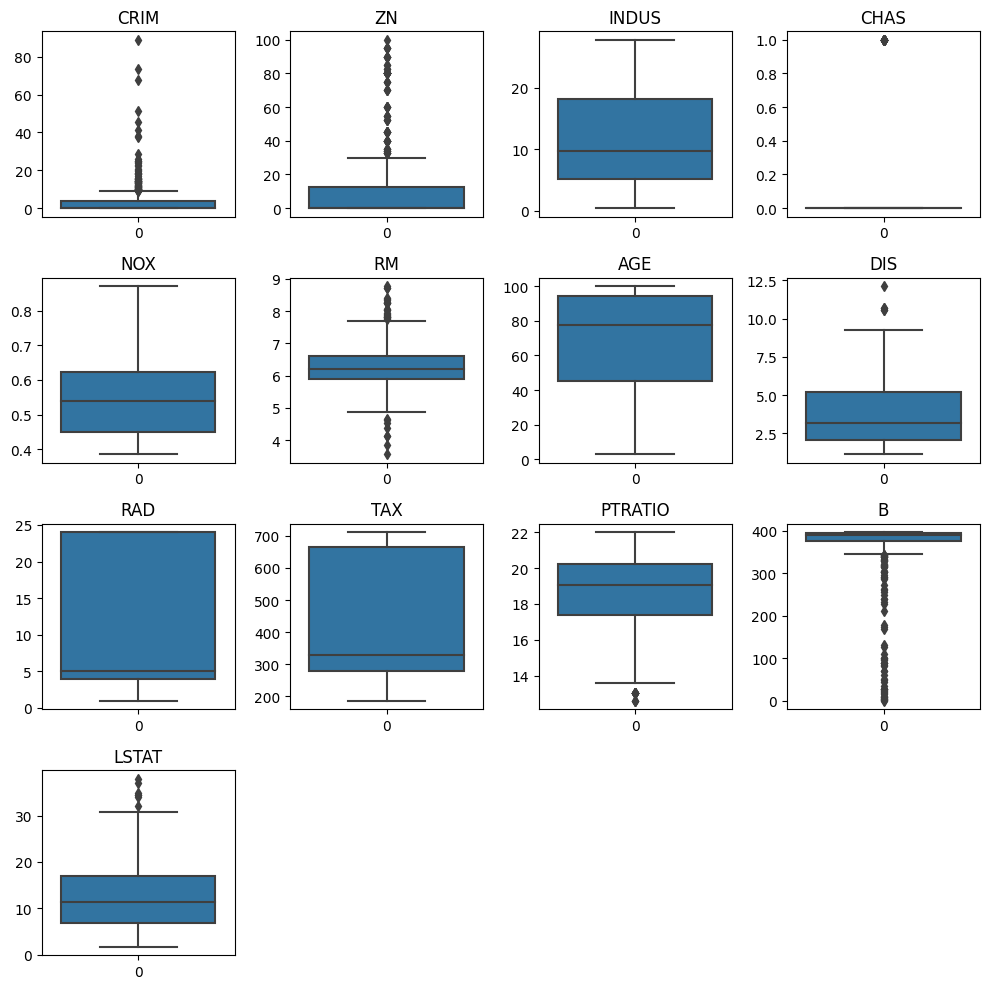

In [18]:
num_cols = df.select_dtypes(include='number').columns
num_cols_count = len(num_cols)
num_cols_sqrt = int(num_cols_count**0.5) + 1

fig, axs = plt.subplots(nrows=num_cols_sqrt, ncols=num_cols_sqrt, figsize=(10,10))

for i, column in enumerate(num_cols):
    row = i // num_cols_sqrt
    col = i % num_cols_sqrt
    sns.boxplot(df[column], ax=axs[row][col])
    axs[row][col].set_title(column)

# Remove empty subplots
for i in range(num_cols_count, num_cols_sqrt*num_cols_sqrt):
    row = i // num_cols_sqrt
    col = i % num_cols_sqrt
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.show()

In [19]:
def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df

In [20]:
import tensorflow as tf
class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 200

    # Genereta random noise in a latent space
    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(15, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(   self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(25, activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model # define the combined generator and discriminator model,
    # for updating the generator
    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model

    # train the generator and discriminator
    def train(self, generator, discriminator, gan):

        # determine half the size of one batch, for updating the  discriminator
        # manually enumerate epochs
        for epoch in range(self.n_epochs):
              # Train the discriminator
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            # Train the generator
            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))


            print('>%d, d1=%.3f, d2=%.3f' %(epoch+1, d_loss, g_loss))

        return generator

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Compute polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Define models
linear_reg = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])
polynomial_reg = LinearRegression()
lasso_reg = Pipeline([('scaler', StandardScaler()), ('poly', poly), ('lasso', Lasso(alpha=0.1))])

# Define cross-validation method
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate models using cross-validation
# Evaluate models using cross-validation
# Evaluate models using cross-validation
for name, model in [('Linear Regression', linear_reg), ('Polynomial Regression', polynomial_reg), ('Lasso Regression', lasso_reg)]:
     if name == 'Polynomial Regression':
        # Compute R2 score, MSE, MAE and RMSE for polynomial regression
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        rmse = np.sqrt(mse)
        print(f'{name} R2 Score: {r2:.3f}')
        print(f'{name} MSE: {mse:.3f}')
        print(f'{name} MAE: {mae:.3f}')
        print(f'{name} RMSE: {rmse:.3f}')
        print(f'{name} Coefficients: {model.coef_}')
    else:
        # Compute R2 score, MSE, MAE and RMSE for linear and Lasso regression
        # Fit the pipeline on the data
        model.fit(X, y)
        r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
        mean_r2 = np.mean(r2_scores)
        std_r2 = np.std(r2_scores)
         print(f'{name} R2 Score: {mean_r2:.3f} +/- {std_r2:.3f}')
        mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
        mean_mse = np.mean(mse_scores)
        std_mse = np.std(mse_scores)
        print(f'{name} MSE: {mean_mse:.3f} +/- {std_mse:.3f}')
        mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
        mean_mae = np.mean(mae_scores)
        std_mae = np.std(mae_scores)
        print(f'{name} MAE: {mean_mae:.3f} +/- {std_mae:.3f}')
        rmse_scores = np.sqrt(mse_scores)
        mean_rmse = np.mean(rmse_scores)
        std_rmse = np.std(rmse_scores)
        print(f'{name} RMSE: {mean_rmse:.3f} +/- {std_rmse:.3f}')
        if name == 'Linear Regression':
            print(f'{name} Coefficients: {model.named_steps["linear"].coef_}')
        else:
            print(f'{name} Coefficients: {model.named_steps["lasso"].coef_}')

In [26]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Boston Housing Price dataset
boston = load_boston()

# Separate features and target variable
X = boston.data
y = boston.target

# Define the degree of polynomial features
degree = 2

# Create polynomial features and scale the data
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Create a Linear Regression model
linear_reg = Pipeline([('scaler', StandardScaler()),('linear', LinearRegression())])

# Create a Lasso Regression model
lasso_reg = Pipeline([('scaler', StandardScaler()), ('poly', poly), ('lasso', Lasso(alpha=0.1))])

# Define the number of folds for cross-validation
k = 5

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate models using cross-validation
for name, model in [('Linear Regression', linear_reg), ('Lasso Regression', lasso_reg)]:
    # Compute R2 score, MSE, MAE, and RMSE
    r2_scores = cross_val_score(model, X_poly, y, cv=kf, scoring='r2')
    mean_r2 = np.mean(r2_scores)
    
    mse_scores = -cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_squared_error')
    mean_mse = np.mean(mse_scores)
    
    mae_scores = -cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_absolute_error')
    mean_mae = np.mean(mae_scores)
    
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse = np.mean(rmse_scores)
    
    # Print the results
    print(f'{name} R2 Score: {mean_r2:.3f}')
    print(f'{name} Mean Squared Error: {mean_mse:.3f}')
    print(f'{name} Mean Absolute Error: {mean_mae:.3f}')
    print(f'{name} Root Mean Squared Error: {mean_rmse:.3f}')
    #print(f'{name} Coefficients: {model.named_steps["linear"].coef_ if name == "Linear Regression" else model.named_steps["lasso"].named_steps["lasso"].coef_}')


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

Linear Regression R2 Score: 0.820
Linear Regression Mean Squared Error: 14.783
Linear Regression Mean Absolute Error: 2.628
Linear Regression Root Mean Squared Error: 3.806


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.282e+00, tolerance: 3.510e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.133e+01, tolerance: 3.472e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the 

Lasso Regression R2 Score: 0.856
Lasso Regression Mean Squared Error: 11.893
Lasso Regression Mean Absolute Error: 2.269
Lasso Regression Root Mean Squared Error: 3.414


In [35]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Boston Housing Price dataset
boston = load_boston()

# Separate features and target variable
X = boston.data
y = boston.target

# Define the degree of polynomial features
degree = 2

# Create polynomial features and scale the data
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Create a Linear Regression model
linear_reg = Pipeline([('scaler', StandardScaler()), ('linear', LinearRegression())])

# Define the number of folds for cross-validation
k = 10

# Initialize KFold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Evaluate the Linear Regression model using cross-validation
# Compute R2 score, MSE, MAE, and RMSE
r2_scores = cross_val_score(linear_reg, X_poly, y, cv=kf, scoring='r2')
mean_r2 = np.mean(r2_scores)

mse_scores = -cross_val_score(linear_reg, X_poly, y, cv=kf, scoring='neg_mean_squared_error')
mean_mse = np.mean(mse_scores)

mae_scores = -cross_val_score(linear_reg, X_poly, y, cv=kf, scoring='neg_mean_absolute_error')
mean_mae = np.mean(mae_scores)

rmse_scores = np.sqrt(mse_scores)
mean_rmse = np.mean(rmse_scores)

# Print the evaluation results
print(f'Linear Regression R2 Score: {mean_r2:.3f}')
print(f'Linear Regression Mean Squared Error: {mean_mse:.3f}')
print(f'Linear Regression Mean Absolute Error: {mean_mae:.3f}')
print(f'Linear Regression Root Mean Squared Error: {mean_rmse:.3f}')


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

Linear Regression R2 Score: 0.842
Linear Regression Mean Squared Error: 13.074
Linear Regression Mean Absolute Error: 2.515
Linear Regression Root Mean Squared Error: 3.555


In [34]:
# Create a StandardScaler and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_poly)

# Create a Linear Regression model and train it on the entire dataset
linear_reg = LinearRegression()
linear_reg.fit(scaler.transform(X_poly), y)

# Now, let's say you have new data for prediction (replace this with your actual new data)

new_data = np.array([[6.320, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.0900, 1.0, 296.0, 15.3, 396.90, 4.98]])

# Create polynomial features for the new data
new_data_poly = poly.transform(new_data)

# Scale the new data using the same scaler as used during training
scaled_new_data = scaler.transform(new_data_poly)

# Make predictions on the new data
predictions = linear_reg.predict(scaled_new_data)

# Print the predictions
print("Predicted Housing Price:", predictions)

Predicted Housing Price: [19.4246868]
